<a href="https://colab.research.google.com/github/Renchulaji/DSASMPFeb25/blob/main/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [3]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [4]:
print(df.head()) #Display first 5 rows

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [6]:
print(df.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [7]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [8]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [9]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [10]:
df = df.drop_duplicates()

In [11]:
df=df.fillna(df.mean())

In [13]:
df['PricePerRoom']=df['MedHouseVal']/df['AveRooms']

In [14]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PricePerRoom
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.648041
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.574691
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.424824
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.586693
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.544744
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.154793
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.126103
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.177311
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.158926


In [15]:
df['HighPopulationArea'] = df['Population'].apply(lambda x: 1 if x > 500 else 0)

In [16]:
df['HighPopulationArea']

,HighPopulationArea
0,0
1,1
2,0
3,1
4,1
...,...
20635,1
20636,0
20637,1
20638,1


In [17]:
income_labels=['Very Low', 'Low','Medium','High', 'Very High']

In [18]:
df['Income_category']=pd.cut(df['MedInc'], bins=5, labels=income_labels)

In [19]:
df['Income_category']

,Income_category
0,Medium
1,Medium
2,Medium
3,Low
4,Low
...,...
20635,Very Low
20636,Very Low
20637,Very Low
20638,Very Low


In [21]:
df = df.drop(['MedInc', 'AveRooms'],axis=1)

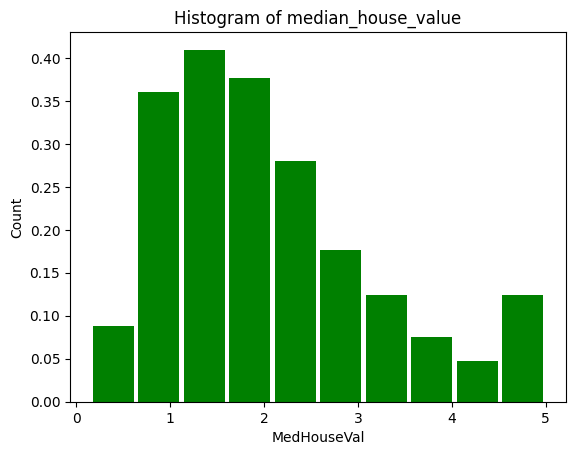

In [24]:
import matplotlib.pyplot as plt
plt.hist(df["MedHouseVal"], color="green", rwidth=0.9, density=True)
plt.title("Histogram of median_house_value")
plt.xlabel("MedHouseVal")
plt.ylabel("Count")
plt.show()

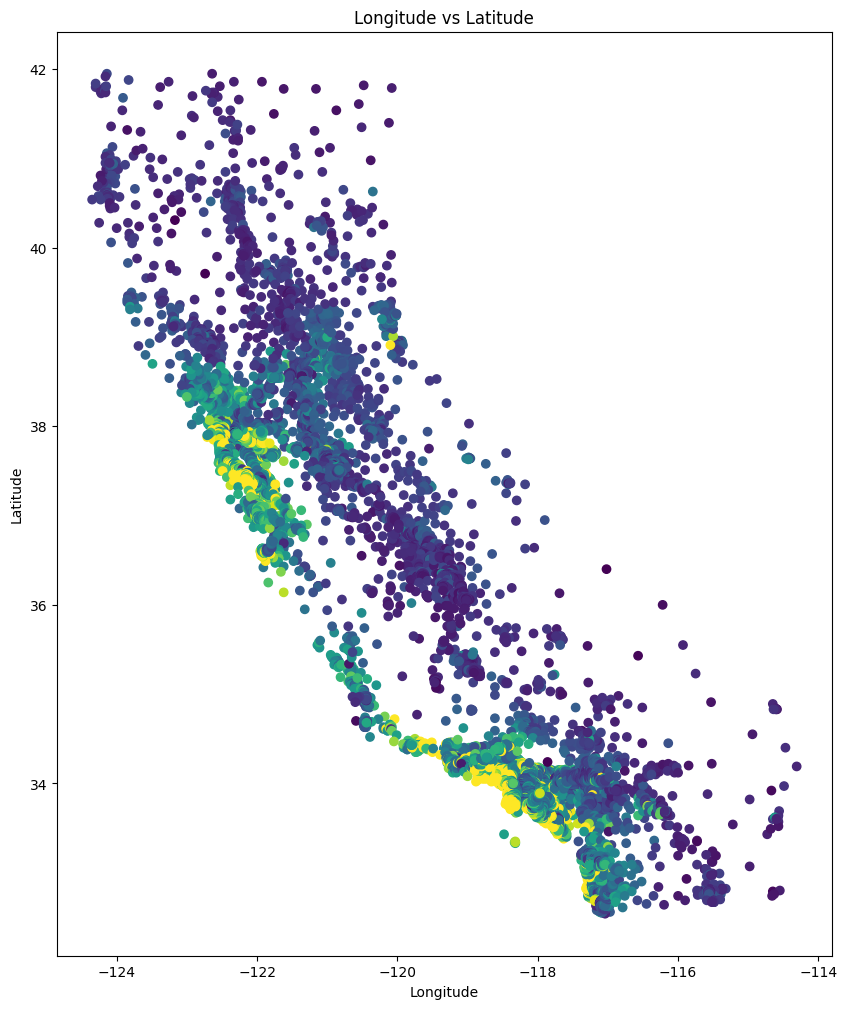

In [34]:
plt.figure(figsize=(10, 12))
plt.scatter(df["Longitude"], df["Latitude"], c=df["MedHouseVal"])
plt.title("Longitude vs Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

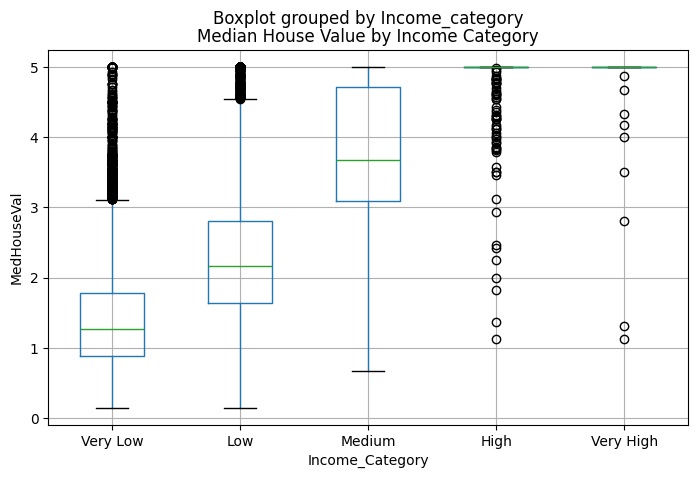

In [44]:
df.boxplot(column='MedHouseVal', by='Income_category', figsize=(8,5))
plt.title('Median House Value by Income Category')
#plt.suptitle('')  # Removes the automatic super title
plt.xlabel('Income_Category')
plt.ylabel('MedHouseVal')
plt.show()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'HouseAge'),
  Text(1.5, 0, 'Latitude'),
  Text(2.5, 0, 'AveBedrms'),
  Text(3.5, 0, 'Population'),
  Text(4.5, 0, 'AveOccup'),
  Text(5.5, 0, 'MedHouseVal'),
  Text(6.5, 0, 'PricePerRoom'),
  Text(7.5, 0, 'HighPopulationArea'),
  Text(8.5, 0, 'Longitude')])

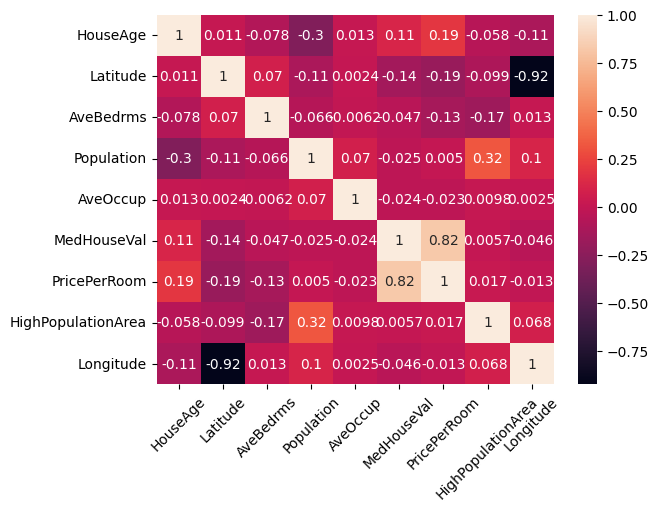

In [49]:
import seaborn as sns
data_new=df[["HouseAge","Latitude","AveBedrms","Population","AveOccup","MedHouseVal","PricePerRoom","HighPopulationArea","Longitude"]]
sns.heatmap(data_new.corr(), annot=True)
plt.xticks(rotation=45)

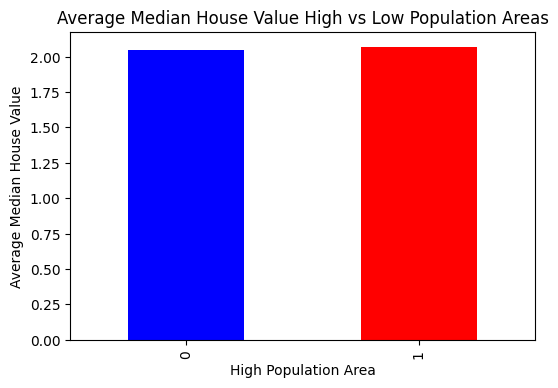

In [55]:
avg_price = df.groupby('HighPopulationArea')['MedHouseVal'].mean()
avg_price.plot(kind='bar', figsize=(6,4), color=['blue', 'red'])
plt.title('Average Median House Value High vs Low Population Areas')
plt.xlabel('High Population Area')
plt.ylabel('Average Median House Value')
plt.show()


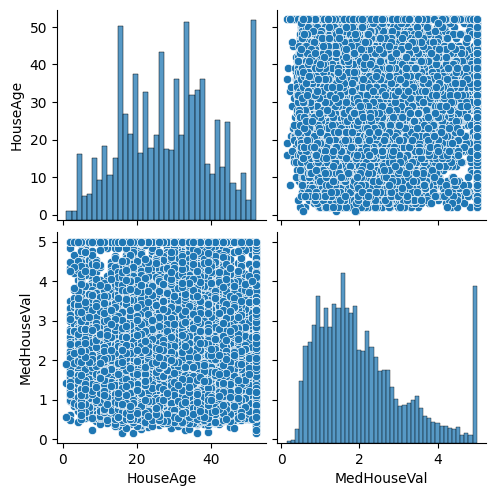

In [58]:
selected_features = df[['HouseAge', 'MedHouseVal']]
sns.pairplot(selected_features)
plt.show()